## **What is LDA?**

In NLP, LDA discovers hidden clusters ("topics") by studying word co-occurrence patterns in documents. Each document receives a "membership score" for each topic, showing its thematic focus while allowing words to belong to multiple topics, like flexible Legos building diverse structures.

Let's take the Lego example:
1. Legos = words in documents.
2. LDA groups Legos by connection patterns, not just color (topic discovery).
3. Each document gets a "theme score" like a Lego set label (relevance to topics).
4. Words can belong to multiple themes, like versatile Legos fit in different builds.
5. LDA unlocks hidden structures in collections of documents, like themes in Lego creations.


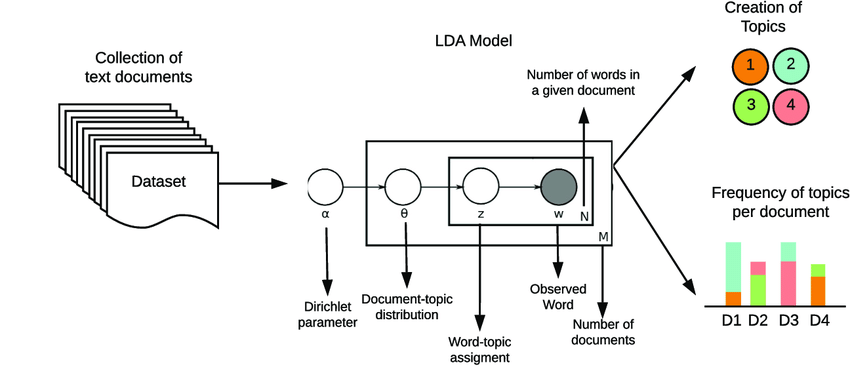


### **Why is LDA better than other clustering techniques?**

**Strengths of LDA:**

* ***Probabilistic***: LDA provides probabilistic scores for each document's membership in various topics, offering a nuanced understanding of thematic coherence.
* ***Topic discovery***: LDA excels at automatically discovering hidden themes without relying on pre-defined categories, making it useful for exploratory analysis.
* ***Soft clustering***: Documents can belong to multiple topics with varying degrees of membership, reflecting the inherent overlap of themes in real-world data.
* ***Interpretability***: LDA is relatively interpretable, as you can analyze the words associated with each topic to understand its meaning.


**Limitations of LDA:**

* ***Bag-of-words assumption:*** LDA treats documents as collections of words without considering their order or grammatical structure, which can limit its accuracy for some tasks.
* ***Number of topics:*** Setting the optimal number of topics remains a challenge, and choosing the wrong number can lead to misleading results.
* ***Computational cost:*** Training LDA can be computationally expensive for large datasets.

*The below implementation is just to show how LDA algorithm really works from within, fortunately we have scikit-learn in our lives.*😆

[Cool article](https://medium.com/@corymaklin/latent-dirichlet-allocation-dfcea0b1fddc)

## Installation

In [ ]:
pip install -q --user nltk

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import itertools
from collections import Counter

In [ ]:
nltk.download('brown')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data pre-processing

In [ ]:
# set the hyperparameters.

n_iters = 200
n_documents = 15
n_topics = 5
eta = 1.5
alpha = 1.5

In [ ]:
# The sentences in the Brown Corpus are already split by whitespace. We manually remove the stop words from the sentences as follows:

np.random.seed(42)
brown = nltk.corpus.brown
documents = np.random.choice(brown.fileids(), n_documents, replace=False)
processed_documents = {}
for document in documents:
    processed_sentences = []
    sentences = brown.sents(document)
    for sentence in sentences:
        processed_sentences.append([word.lower() for word in sentence if word.isalnum() and word not in stopwords])
    processed_documents[document] = processed_sentences

In [ ]:
processed_documents.keys()

dict_keys(['cj68', 'cc03', 'ck01', 'cf15', 'cd17', 'ck21', 'ck04', 'ce20', 'cb25', 'cn18', 'ca10', 'cg06', 'cl04', 'cc14', 'cj78'])

In [ ]:
brown.sents(document)

[['High-gain', ',', 'photoelectronic', 'image', 'intensification', 'is', 'applied', 'under', 'conditions', 'of', 'low', 'incident', 'light', 'levels', 'whenever', 'the', 'integration', 'time', 'required', 'by', 'a', 'sensor', 'or', 'recording', 'instrument', 'exceeds', 'the', 'limits', 'of', 'practicability', '.'], ['Examples', 'of', 'such', 'situations', 'are', '(', 'aerial', ')', 'night', 'reconnaissance', ',', 'the', 'recording', 'of', 'radioactive', 'tracers', 'in', 'live', 'body', 'tissues', ',', 'special', 'radiography', 'in', 'medical', 'or', 'industrial', 'applications', ',', 'track', 'recording', 'of', 'high', 'energy', 'particles', ',', 'etc.', '.'], ...]

In [ ]:
processed_documents["cj68"]

[['recent',
  'criticism',
  'great',
  'expectations',
  'tended',
  'emphasize',
  'symbolic',
  'mythic',
  'content',
  'show',
  'zabel',
  'said',
  'dickens',
  'generally',
  'much',
  'impact',
  'resides',
  'allegoric',
  'insight',
  'moral',
  'metaphor'],
 ['excellent',
  'chapter',
  'great',
  'expectations',
  'lately',
  'illustrated',
  'fruitfully',
  'novel',
  'read',
  'perspective'],
 ['in',
  'analysis',
  'however',
  'touches',
  'upon',
  'fails',
  'explore',
  'idea',
  'generally',
  'neglected',
  'discussions',
  'book',
  'i',
  'believe',
  'central',
  'art',
  'importance',
  'human',
  'hands',
  'recurring',
  'feature',
  'narrative'],
 ['this', 'essay', 'seeks', 'make', 'exploration'],
 ['dickens', 'nothing', 'theatrical', 'great', 'victorian', 'writers'],
 ['he',
  'knew',
  'instinctively',
  'next',
  'voice',
  'face',
  'hands',
  'useful',
  'possession',
  'fiction',
  'theatre',
  'gesture',
  'indispensable',
  'shorthand',
  'individua

In [ ]:
# We store a list of all the unique tokens.

processed_sentences = list(itertools.chain(*list(processed_documents.values())))
unique_tokens = list(set(itertools.chain(*processed_sentences)))
n_tokens = len(unique_tokens)

In [ ]:
n_tokens


6078

In [ ]:
# mapping every word with a given number.
token2int = dict(zip(unique_tokens, range(n_tokens)))

In [ ]:
token2int

{'5': 0,
 'known': 1,
 'oil': 2,
 'used': 3,
 'claim': 4,
 'distant': 5,
 'disagree': 6,
 'decision': 7,
 'deferred': 8,
 'suit': 9,
 'transmission': 10,
 'huddled': 11,
 'impact': 12,
 'nickname': 13,
 'bolder': 14,
 'partners': 15,
 'jumping': 16,
 'squire': 17,
 'remainder': 18,
 'bewildered': 19,
 'simultaneously': 20,
 'langhorne': 21,
 'distinction': 22,
 'tone': 23,
 'differential': 24,
 'upstairs': 25,
 'thought': 26,
 'afraid': 27,
 'office': 28,
 'reupholstering': 29,
 'framing': 30,
 'dancing': 31,
 'features': 32,
 'hundreds': 33,
 'shower': 34,
 'thick': 35,
 'among': 36,
 'wisdom': 37,
 'delights': 38,
 'veined': 39,
 'cities': 40,
 'browning': 41,
 'krakowiak': 42,
 'vessel': 43,
 'spectator': 44,
 'parenthood': 45,
 'inherit': 46,
 'native': 47,
 'housed': 48,
 'foreign': 49,
 'length': 50,
 'visiting': 51,
 'maestro': 52,
 'considering': 53,
 'falstaff': 54,
 'sensibilities': 55,
 'incertain': 56,
 'retribution': 57,
 'fiction': 58,
 'whetted': 59,
 'attachment': 60,
 

In [ ]:
# every document is associated with a given number.

document2int = dict(zip(documents, range(n_documents)))

In [ ]:
document2int

{'cj68': 0,
 'cc03': 1,
 'ck01': 2,
 'cf15': 3,
 'cd17': 4,
 'ck21': 5,
 'ck04': 6,
 'ce20': 7,
 'cb25': 8,
 'cn18': 9,
 'ca10': 10,
 'cg06': 11,
 'cl04': 12,
 'cc14': 13,
 'cj78': 14}

In [ ]:
# We define a function to randomly assign a topic to a given word in a document.

def get_topic_assignment(processed_documents, n_topics):
    np.random.seed(42)
    topic_assignment = {}
    for document, sentences in processed_documents.items():
        words = list(itertools.chain(*sentences))
        topics_assigned = np.random.choice(range(n_topics), len(words), replace=True)
        topic_assignment[document] = list(zip(words, topics_assigned))
    return topic_assignment

In [ ]:
initial_topic_assignment = get_topic_assignment(processed_documents, n_topics)

In [ ]:
initial_topic_assignment

{'cj68': [('recent', 3),
  ('criticism', 4),
  ('great', 2),
  ('expectations', 4),
  ('tended', 4),
  ('emphasize', 1),
  ('symbolic', 2),
  ('mythic', 2),
  ('content', 2),
  ('show', 4),
  ('zabel', 3),
  ('said', 2),
  ('dickens', 4),
  ('generally', 1),
  ('much', 3),
  ('impact', 1),
  ('resides', 3),
  ('allegoric', 4),
  ('insight', 0),
  ('moral', 3),
  ('metaphor', 1),
  ('excellent', 4),
  ('chapter', 3),
  ('great', 0),
  ('expectations', 0),
  ('lately', 2),
  ('illustrated', 2),
  ('fruitfully', 1),
  ('novel', 3),
  ('read', 3),
  ('perspective', 2),
  ('in', 3),
  ('analysis', 3),
  ('however', 0),
  ('touches', 2),
  ('upon', 4),
  ('fails', 2),
  ('explore', 4),
  ('idea', 0),
  ('generally', 1),
  ('neglected', 3),
  ('discussions', 0),
  ('book', 3),
  ('i', 1),
  ('believe', 1),
  ('central', 0),
  ('art', 1),
  ('importance', 4),
  ('human', 1),
  ('hands', 3),
  ('recurring', 3),
  ('feature', 3),
  ('narrative', 3),
  ('this', 4),
  ('essay', 2),
  ('seeks', 0),

## **Calculating Matrices:**

Two matrices are calculated: CWT (number of times word w is assigned to topic j) and CDT (number of times topic j is assigned to word token in document d).

In [ ]:
# We define the matrix containing the number of times word w is assigned to topic j.

def get_CWT_matrix(topic_assignment):
    word_topics = topic_assignment.values()
    count_word_topics_dict = Counter(list(itertools.chain(*word_topics)))
    CWT_words = np.array(list(count_word_topics_dict.keys()))[:, 0]
    CWT_words = list(map(lambda x: token2int[x], CWT_words))
    CWT_topics = list(map(int, np.array(list(count_word_topics_dict.keys()))[:, 1]))
    counts = list(count_word_topics_dict.values())
    CWT = np.zeros((n_tokens, n_topics), dtype='int')
    CWT[CWT_words, CWT_topics] = counts
    return CWT

In [ ]:
# compute the matrix given our initial random topic assignments.

CWT = get_CWT_matrix(initial_topic_assignment)

In [ ]:
CWT

array([[0, 0, 1, 0, 0],
       [1, 2, 2, 0, 2],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
# We define a function to calculate the matrix that contains the number of times topic j is assigned to some word token in document d.

def get_CDT_matrix(topic_assignment):
    CDT = np.zeros((n_documents, n_topics), dtype='int')
    for document, word_topics in topic_assignment.items():
        count_topic_dict = Counter(list(map(int, np.array(word_topics)[:, 1])))
        topic_indices = list(count_topic_dict.keys())
        topic_counts = list(count_topic_dict.values())
        CDT[document2int[document], topic_indices] = topic_counts
    return CDT

In [ ]:
# we compute the matrix given our initial random topic assignments.

CDT = get_CDT_matrix(initial_topic_assignment)

In [ ]:
CDT

array([[218, 194, 193, 213, 211],
       [229, 245, 215, 224, 231],
       [220, 197, 223, 239, 233],
       [236, 213, 240, 214, 230],
       [208, 219, 223, 245, 225],
       [239, 269, 210, 226, 248],
       [201, 251, 216, 203, 216],
       [248, 230, 206, 223, 206],
       [248, 197, 215, 187, 219],
       [179, 203, 208, 210, 222],
       [213, 226, 214, 229, 256],
       [247, 233, 216, 264, 221],
       [200, 240, 208, 218, 219],
       [260, 259, 229, 251, 255],
       [253, 278, 245, 246, 256]])

## **Probability Calculation:**

Using Gibbs sampling, the probability that a word in a document is associated with a topic is calculated using specific formulas involving the matrices, vocabulary length, number of topics, and hyperparameters alpha and eta.

In [ ]:
# We define a function to compute the probability

def get_sampled_topic(word_index, document_index, CWT, CDT):
    distribution = []
    for topic_index in range(n_topics):
        pwt = (CWT[word_index, topic_index] -1 + eta) / (np.sum(CWT[:, topic_index]) + n_tokens * eta)
        pdt = (CDT[document_index, topic_index] -1 + alpha) /  (np.sum(CDT[document_index, :]) + n_topics * alpha)
        p = pwt * pdt
        distribution.append(p)
# normalize probabilities such that they sum to 1
    distribution = distribution / sum(distribution)
    outcome = np.random.multinomial(1, distribution)
    sampled_topic_index = np.where(outcome==1)[0][0]
    return sampled_topic_index

In [ ]:
# We select the first pair as arguments.
dict_pairs = initial_topic_assignment.items()
pairs_iterator = iter(dict_pairs)
document, word_topics = next(pairs_iterator)

In [ ]:
document

'cj68'

In [ ]:
word_topics

[('recent', 3),
 ('criticism', 4),
 ('great', 2),
 ('expectations', 4),
 ('tended', 4),
 ('emphasize', 1),
 ('symbolic', 2),
 ('mythic', 2),
 ('content', 2),
 ('show', 4),
 ('zabel', 3),
 ('said', 2),
 ('dickens', 4),
 ('generally', 1),
 ('much', 3),
 ('impact', 1),
 ('resides', 3),
 ('allegoric', 4),
 ('insight', 0),
 ('moral', 3),
 ('metaphor', 1),
 ('excellent', 4),
 ('chapter', 3),
 ('great', 0),
 ('expectations', 0),
 ('lately', 2),
 ('illustrated', 2),
 ('fruitfully', 1),
 ('novel', 3),
 ('read', 3),
 ('perspective', 2),
 ('in', 3),
 ('analysis', 3),
 ('however', 0),
 ('touches', 2),
 ('upon', 4),
 ('fails', 2),
 ('explore', 4),
 ('idea', 0),
 ('generally', 1),
 ('neglected', 3),
 ('discussions', 0),
 ('book', 3),
 ('i', 1),
 ('believe', 1),
 ('central', 0),
 ('art', 1),
 ('importance', 4),
 ('human', 1),
 ('hands', 3),
 ('recurring', 3),
 ('feature', 3),
 ('narrative', 3),
 ('this', 4),
 ('essay', 2),
 ('seeks', 0),
 ('make', 3),
 ('exploration', 1),
 ('dickens', 3),
 ('nothing'

In [ ]:
document_index = document2int[document]
word, assigned_topic = word_topics[0]
word_index = token2int[word]
get_sampled_topic(word_index, document_index, CWT, CDT)

1

In [ ]:
# We define the function that performs Gibbs sampling.

def get_gibbs_sample(input_topic_assignment):
    CWT = get_CWT_matrix(input_topic_assignment)
    CDT = get_CDT_matrix(input_topic_assignment)
    new_topic_assignment = {}
    for document, word_topics in input_topic_assignment.items():
        document_index = document2int[document]
        new_topic_assignment[document] = []
        for word, _ in word_topics:
            word_index = token2int[word]
            sampled_topic = get_sampled_topic(word_index, document_index, CWT, CDT)
            new_topic_assignment[document].append((word, sampled_topic))
    return new_topic_assignment

In [ ]:
get_gibbs_sample(initial_topic_assignment)


{'cj68': [('recent', 2),
  ('criticism', 1),
  ('great', 2),
  ('expectations', 3),
  ('tended', 2),
  ('emphasize', 1),
  ('symbolic', 0),
  ('mythic', 3),
  ('content', 1),
  ('show', 1),
  ('zabel', 3),
  ('said', 4),
  ('dickens', 2),
  ('generally', 2),
  ('much', 4),
  ('impact', 1),
  ('resides', 0),
  ('allegoric', 0),
  ('insight', 3),
  ('moral', 2),
  ('metaphor', 0),
  ('excellent', 1),
  ('chapter', 3),
  ('great', 0),
  ('expectations', 3),
  ('lately', 0),
  ('illustrated', 3),
  ('fruitfully', 1),
  ('novel', 4),
  ('read', 3),
  ('perspective', 1),
  ('in', 1),
  ('analysis', 3),
  ('however', 4),
  ('touches', 3),
  ('upon', 4),
  ('fails', 1),
  ('explore', 0),
  ('idea', 0),
  ('generally', 0),
  ('neglected', 3),
  ('discussions', 1),
  ('book', 4),
  ('i', 4),
  ('believe', 4),
  ('central', 1),
  ('art', 3),
  ('importance', 2),
  ('human', 1),
  ('hands', 4),
  ('recurring', 0),
  ('feature', 0),
  ('narrative', 1),
  ('this', 1),
  ('essay', 2),
  ('seeks', 2),

## **Iterative Process:**

The above steps are repeated for a certain number of iterations (n_iters).

In [ ]:
# we define a function to execute the LDA algorithm.

def run_lda(processed_documents, n_topics, n_iters):
  topic_assignment = get_topic_assignment(processed_documents, n_topics)
  for n_iter in range(n_iters):
          new_topic_assignment = get_gibbs_sample(topic_assignment)
          topic_assignment = new_topic_assignment
  if (n_iter + 1) % 10 == 0:
              print(f'Iteration {n_iter + 1}')
  return topic_assignment

In [ ]:
# We pass the preprocessed documents, the number of topics and the number of iterations and store the result in a variable.
topic_assignment = run_lda(processed_documents, n_topics, n_iters)

Iteration 200


In [ ]:
topic_assignment

{'cj68': [('recent', 0),
  ('criticism', 0),
  ('great', 0),
  ('expectations', 0),
  ('tended', 0),
  ('emphasize', 0),
  ('symbolic', 0),
  ('mythic', 0),
  ('content', 0),
  ('show', 0),
  ('zabel', 0),
  ('said', 0),
  ('dickens', 0),
  ('generally', 0),
  ('much', 0),
  ('impact', 0),
  ('resides', 0),
  ('allegoric', 0),
  ('insight', 0),
  ('moral', 0),
  ('metaphor', 0),
  ('excellent', 0),
  ('chapter', 0),
  ('great', 0),
  ('expectations', 0),
  ('lately', 0),
  ('illustrated', 0),
  ('fruitfully', 0),
  ('novel', 0),
  ('read', 0),
  ('perspective', 0),
  ('in', 4),
  ('analysis', 0),
  ('however', 0),
  ('touches', 0),
  ('upon', 0),
  ('fails', 0),
  ('explore', 0),
  ('idea', 0),
  ('generally', 0),
  ('neglected', 0),
  ('discussions', 0),
  ('book', 0),
  ('i', 0),
  ('believe', 0),
  ('central', 0),
  ('art', 0),
  ('importance', 0),
  ('human', 0),
  ('hands', 0),
  ('recurring', 0),
  ('feature', 0),
  ('narrative', 0),
  ('this', 0),
  ('essay', 0),
  ('seeks', 0),